# Grafo Ponderado

In [5]:
# Importando Bibliotecas necessárias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Lendo as informações das arestas e dos vértices
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [7]:
# Criando o grafo
g = nx.Graph()

In [8]:
# Adicionando Nós e ligações
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [9]:
# Adicionando Posicionamento para os nós
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [10]:
# Posicionamento para o plot
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

In [11]:
# Cores para os vértices
edge_colors = [e[2]['attr_dict']['color'] for e in g.edges(data=True)]

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


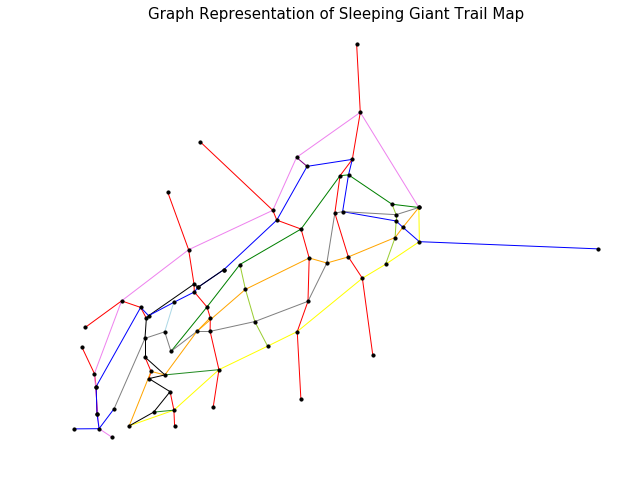

In [12]:
# Plotando o grafo
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()